In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest
import folium

In [48]:
df = pd.read_csv('Data\Airbnb Listings Bangkok.csv')
df = df.drop('Unnamed: 0', axis=1)
display(df.head(),df.tail())

id                                            name  host_id  \
0   27934                 Nice room with superb city view   120437   
1   27979                  Easy going landlord,easy place   120541   
2   28745               modern-style apartment in Bangkok   123784   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  941865                      Suite Room 3 at MetroPoint   610315   

    host_name neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee   Ratchathewi     13.76     100.54  Entire home/apt   1905   
1         Emy       Bang Na     13.67     100.62     Private room   1316   
2  Familyroom     Bang Kapi     13.75     100.62     Private room    800   
3     Sirilak     Din Daeng     13.79     100.57     Private room   1286   
4       Kasem     Bang Kapi     13.77     100.63     Private room   1905   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               3                 65  2020-01-06               0.50   
1               1                  0         NaN                NaN   
2              60                  0         NaN                NaN   
3               7                  2  2022-04-01               0.03   
4               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

id                                               name  \
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id  host_name neighbourhood  latitude  longitude     room_type  \
15849   94899359      Renee       Pra Wet     13.72     100.65  Private room   
15850  491526222  Phakhamon   Ratchathewi     13.75     100.54  Private room   
15851  491526222  Phakhamon   Ratchathewi     13.75     100.54  Private room   
15852  491526222  Phakhamon   Ratchathewi     13.75     100.54  Private room   
15853  491526222  Phakhamon   Ratchathewi     13.75     100.54  Private room   

       price  minimum_nights  number_of_reviews last_review  \
15849   2298              28                  0         NaN   
15850   1429               1                  0         NaN   
15851   1214               1                  0         NaN   
15852   1214               1                  0         NaN   
15853   1214               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
15849                      0  
15850                      0  
15851                      0  
15852                      0  
15853                      0

In [49]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [50]:
duplicate = df[df.duplicated()]
print(duplicate)
print(df.isnull().sum())

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


In [51]:
df.drop(['host_name'], axis = 1, inplace =  True)
df.fillna({'last_review': 0}, inplace = True)
df.fillna({'reviews_per_month': 0}, inplace = True)
print(df.isnull().sum())

id                                0
name                              8
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


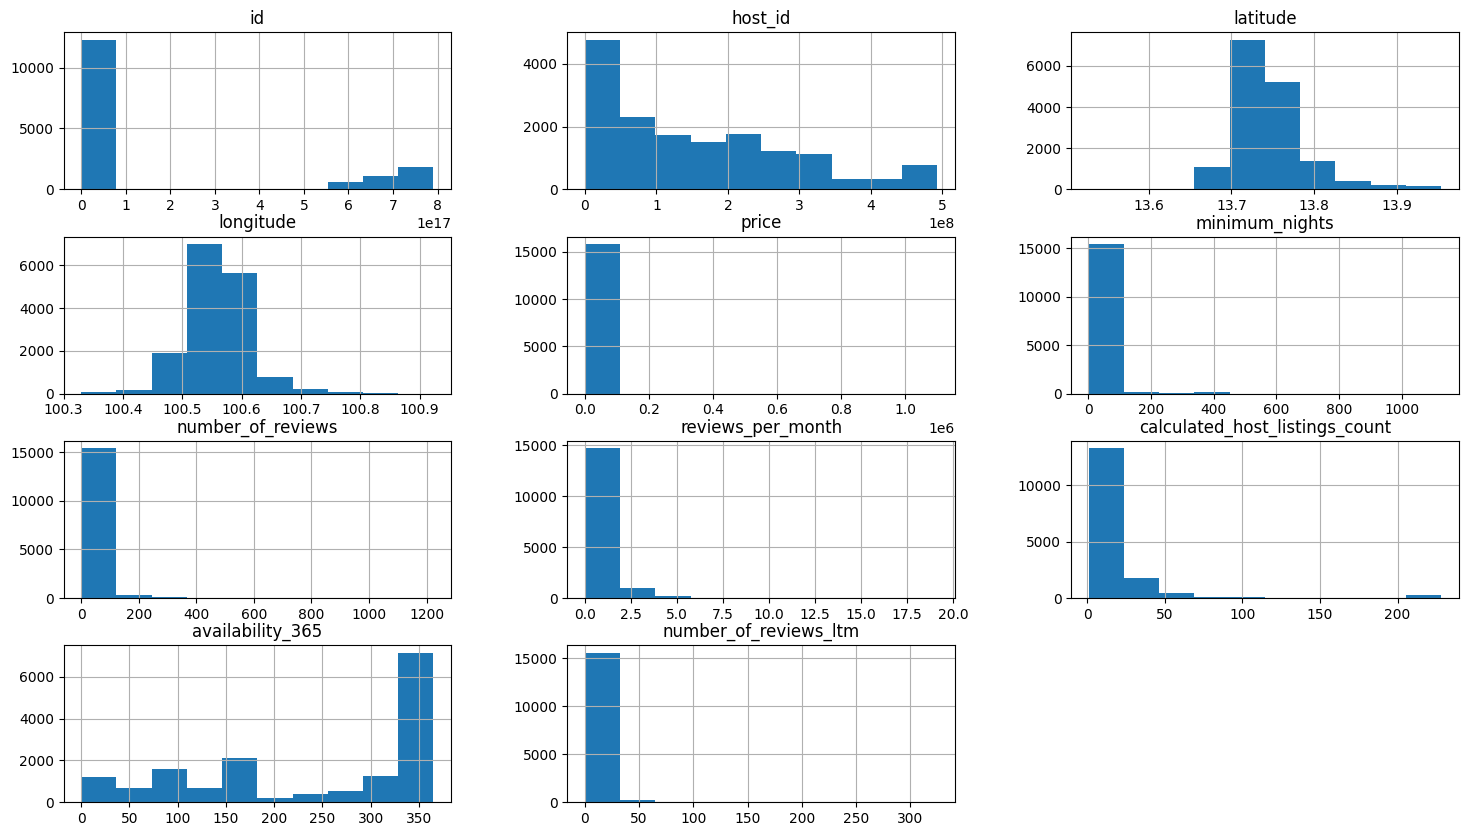

In [52]:
df.hist(figsize=(18, 10))
plt.show()

In [53]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
df.describe()

id      host_id  latitude  longitude      price  \
count              15854.00     15854.00  15854.00   15854.00   15854.00   
mean  157939679701701248.00 154105783.58     13.75     100.56    3217.70   
std   294601541771321664.00 131872648.11      0.04       0.05   24972.12   
min                27934.00     58920.00     13.53     100.33       0.00   
25%             21045091.50  39744308.00     13.72     100.53     900.00   
50%             35037340.00 122455569.00     13.74     100.56    1429.00   
75%             52561542.25 239054687.50     13.76     100.59    2429.00   
max   790816217344482048.00 492665929.00     13.95     100.92 1100000.00   

       minimum_nights  number_of_reviews  reviews_per_month  \
count        15854.00           15854.00           15854.00   
mean            15.29              16.65               0.52   
std             50.82              40.61               0.95   
min              1.00               0.00               0.00   
25%              1.00               0.00               0.00   
50%              1.00               2.00               0.09   
75%              7.00              13.00               0.67   
max           1125.00            1224.00              19.13   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                        15854.00          15854.00               15854.00  
mean                            13.89            244.38                   3.48  
std                             30.27            125.84                   8.92  
min                              1.00              0.00                   0.00  
25%                              1.00            138.00                   0.00  
50%                              4.00            309.00                   0.00  
75%                             13.00            360.00                   3.00  
max                            228.00            365.00                 325.00

In [54]:
shapiro_price = shapiro(df['price'])
print("Shapiro-Wilk test for 'price':")
print("Statistic:", shapiro_price[0])
print("p-value:", shapiro_price[1])

ks_statistic, p_value = kstest(df['price'], 'norm')
print("\nKS test for 'price':")
print("Statistic:", ks_statistic)
print("p-value:", p_value)

shapiro_min_nights = shapiro(df['minimum_nights'])
print("\nShapiro-Wilk test for 'minimum_nights':")
print("Statistic:", shapiro_min_nights[0])
print("p-value:", shapiro_min_nights[1])

ks_statistic, p_value = kstest(df['minimum_nights'], 'norm')
print("\nKS test for 'minimum_nights':")
print("Statistic:", ks_statistic)
print("p-value:", p_value)


Shapiro-Wilk test for 'price':
Statistic: 0.0444185733795166
p-value: 0.0

KS test for 'price':
Statistic: 0.9999369244354737
p-value: 0.0

Shapiro-Wilk test for 'minimum_nights':
Statistic: 0.27977824211120605
p-value: 0.0

KS test for 'minimum_nights':
Statistic: 0.8413447460685429
p-value: 0.0


c:\Users\Nicholas Aprilie\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
median_price = df["price"].median()

df["price"].replace(0, median_price, inplace=True)

df.describe()

id      host_id  latitude  longitude      price  \
count              15854.00     15854.00  15854.00   15854.00   15854.00   
mean  157939679701701248.00 154105783.58     13.75     100.56    3217.79   
std   294601541771321664.00 131872648.11      0.04       0.05   24972.11   
min                27934.00     58920.00     13.53     100.33     278.00   
25%             21045091.50  39744308.00     13.72     100.53     900.00   
50%             35037340.00 122455569.00     13.74     100.56    1429.00   
75%             52561542.25 239054687.50     13.76     100.59    2429.00   
max   790816217344482048.00 492665929.00     13.95     100.92 1100000.00   

       minimum_nights  number_of_reviews  reviews_per_month  \
count        15854.00           15854.00           15854.00   
mean            15.29              16.65               0.52   
std             50.82              40.61               0.95   
min              1.00               0.00               0.00   
25%              1.00               0.00               0.00   
50%              1.00               2.00               0.09   
75%              7.00              13.00               0.67   
max           1125.00            1224.00              19.13   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                        15854.00          15854.00               15854.00  
mean                            13.89            244.38                   3.48  
std                             30.27            125.84                   8.92  
min                              1.00              0.00                   0.00  
25%                              1.00            138.00                   0.00  
50%                              4.00            309.00                   0.00  
75%                             13.00            360.00                   3.00  
max                            228.00            365.00                 325.00

In [56]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

percentage_outliers = (len(outliers) / len(df)) * 100
print(percentage_outliers)

8.849501703040243


In [57]:
# Outlier proportion relatively large at 9% (Dropping data may create bias)
median_price = df['price'].median()
df.loc[(df['price'] < lower_bound) | (df['price'] > upper_bound), 'price'] = median_price
df.describe()

id      host_id  latitude  longitude    price  \
count              15854.00     15854.00  15854.00   15854.00 15854.00   
mean  157939679701701248.00 154105783.58     13.75     100.56  1551.79   
std   294601541771321664.00 131872648.11      0.04       0.05   900.67   
min                27934.00     58920.00     13.53     100.33   278.00   
25%             21045091.50  39744308.00     13.72     100.53   900.00   
50%             35037340.00 122455569.00     13.74     100.56  1429.00   
75%             52561542.25 239054687.50     13.76     100.59  1900.00   
max   790816217344482048.00 492665929.00     13.95     100.92  4720.00   

       minimum_nights  number_of_reviews  reviews_per_month  \
count        15854.00           15854.00           15854.00   
mean            15.29              16.65               0.52   
std             50.82              40.61               0.95   
min              1.00               0.00               0.00   
25%              1.00               0.00               0.00   
50%              1.00               2.00               0.09   
75%              7.00              13.00               0.67   
max           1125.00            1224.00              19.13   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                        15854.00          15854.00               15854.00  
mean                            13.89            244.38                   3.48  
std                             30.27            125.84                   8.92  
min                              1.00              0.00                   0.00  
25%                              1.00            138.00                   0.00  
50%                              4.00            309.00                   0.00  
75%                             13.00            360.00                   3.00  
max                            228.00            365.00                 325.00

In [58]:
df['minimum_stay'] = df['minimum_nights'].apply(lambda x: 'Short-Term' if x < 28 else 'Long-Term')
display(df.head())

id                                            name  host_id  \
0   27934                 Nice room with superb city view   120437   
1   27979                  Easy going landlord,easy place   120541   
2   28745               modern-style apartment in Bangkok   123784   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  941865                      Suite Room 3 at MetroPoint   610315   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi     13.76     100.54  Entire home/apt   1905               3   
1       Bang Na     13.67     100.62     Private room   1316               1   
2     Bang Kapi     13.75     100.62     Private room    800              60   
3     Din Daeng     13.79     100.57     Private room   1286               7   
4     Bang Kapi     13.77     100.63     Private room   1905               1   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
1                  0           0               0.00   
2                  0           0               0.00   
3                  2  2022-04-01               0.03   
4                  0           0               0.00   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               365                      0   
3                               1               323                      1   
4                               3               365                      0   

  minimum_stay  
0   Short-Term  
1   Short-Term  
2    Long-Term  
3   Short-Term  
4   Short-Term

<Axes: >

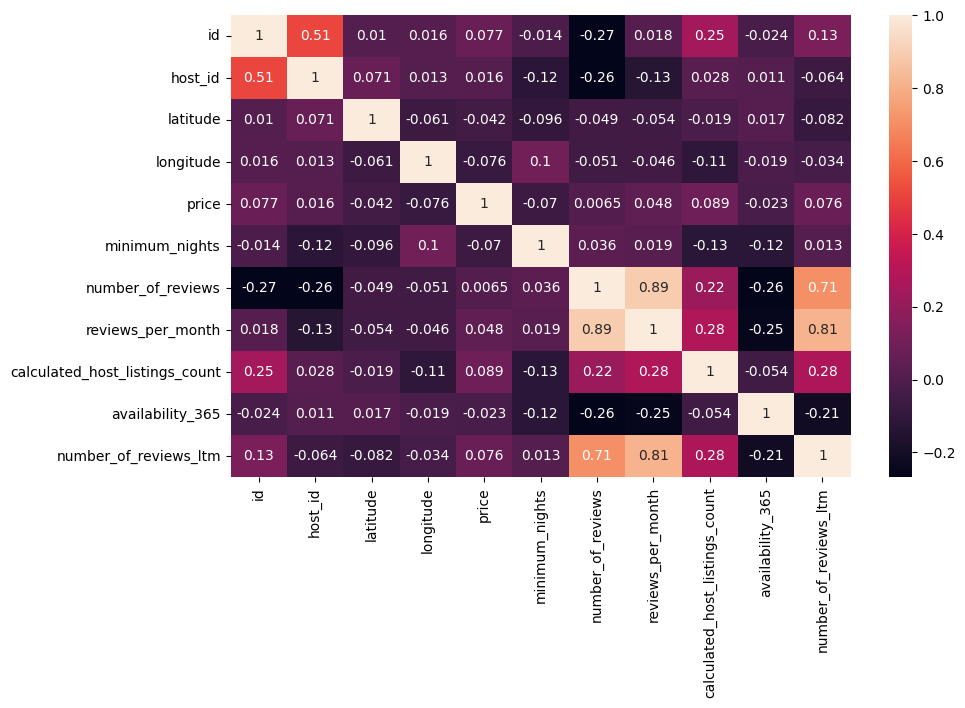

In [59]:
numerical_df = df.select_dtypes(include='number')
corr = numerical_df.corr(method='spearman')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

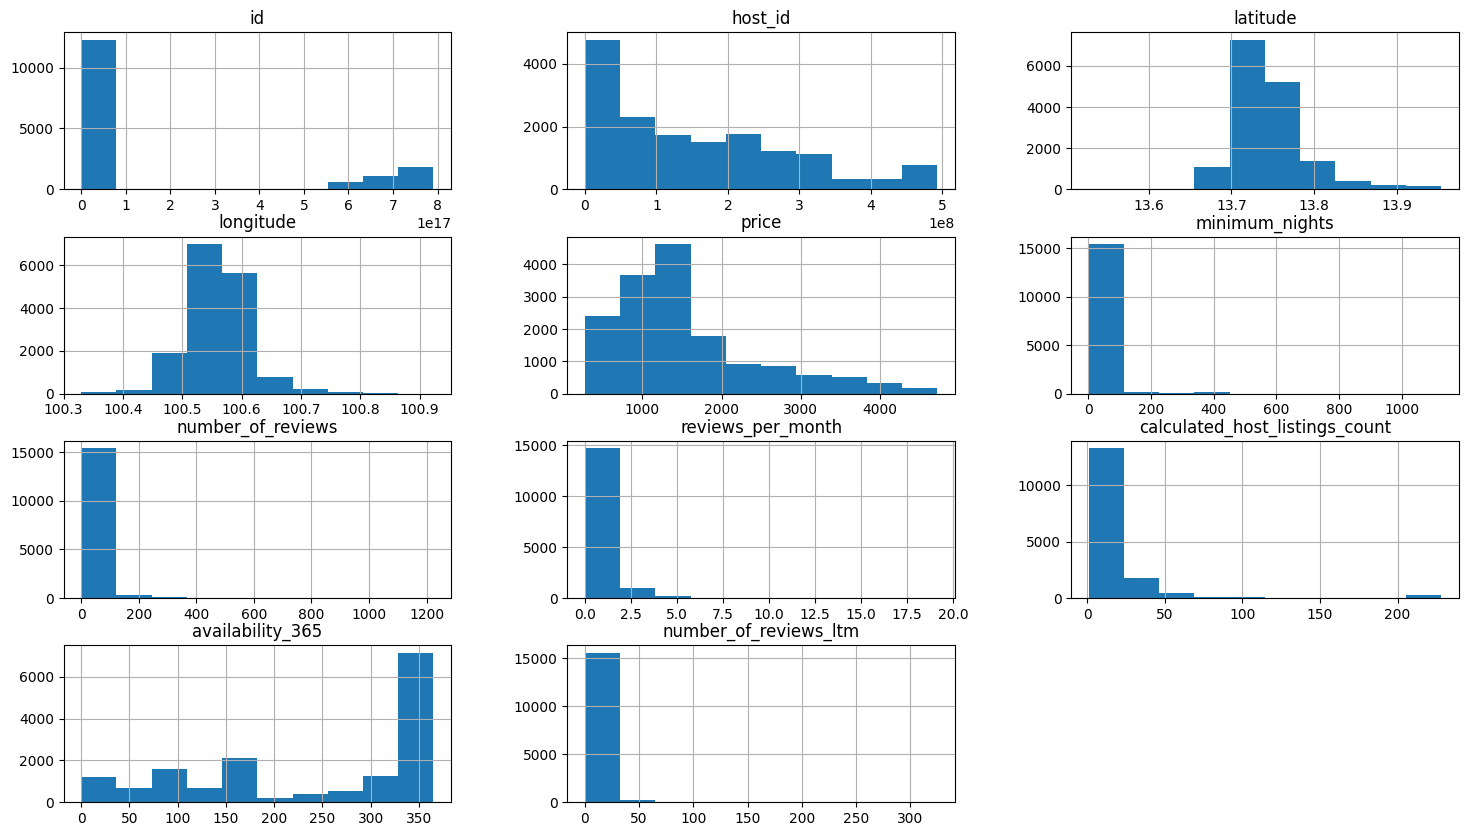

In [60]:
df.hist(figsize=(18, 10))
plt.show()

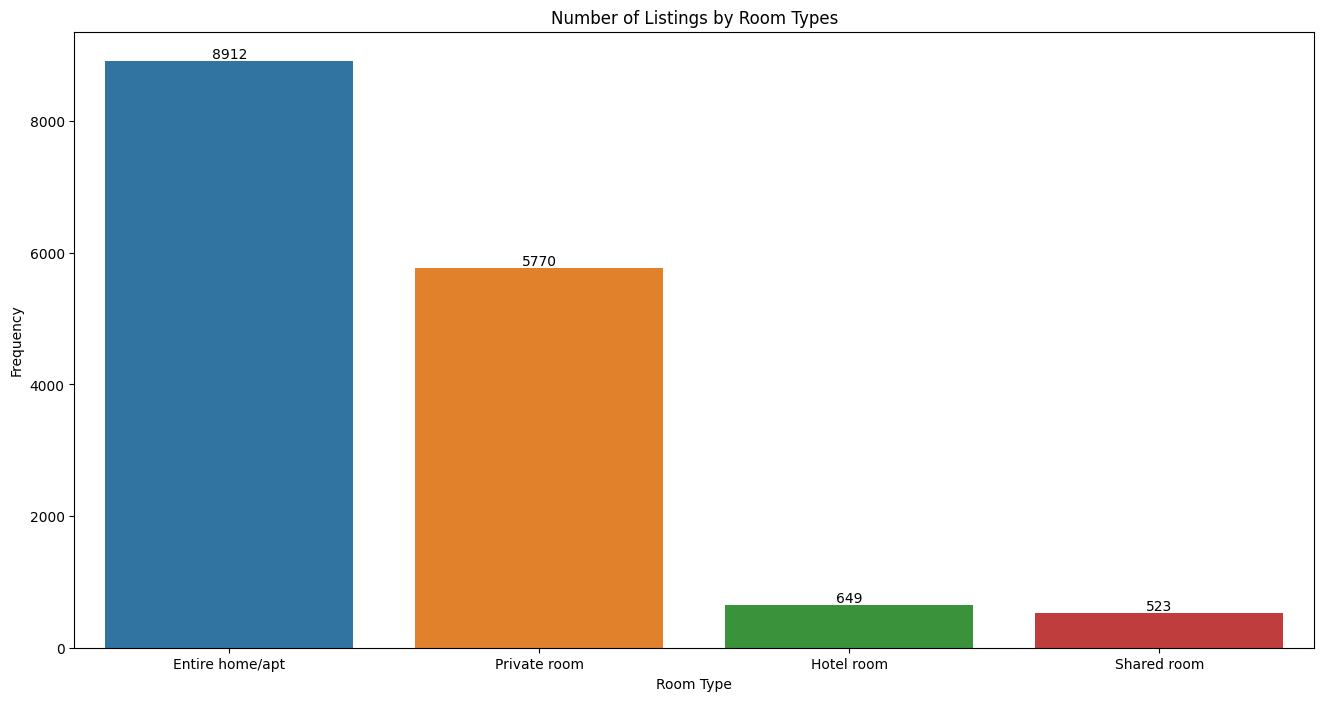

In [61]:
room_type_counts = df['room_type'].value_counts().reset_index()

plt.figure(figsize = (16,8))
axes = sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
value = df['room_type'].value_counts(ascending=False)
labels = []
for p in zip(value):
    labels.append(f'{p[0]}')
axes.bar_label(container=axes.containers[0], labels=labels)

plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Number of Listings by Room Types')

plt.show()

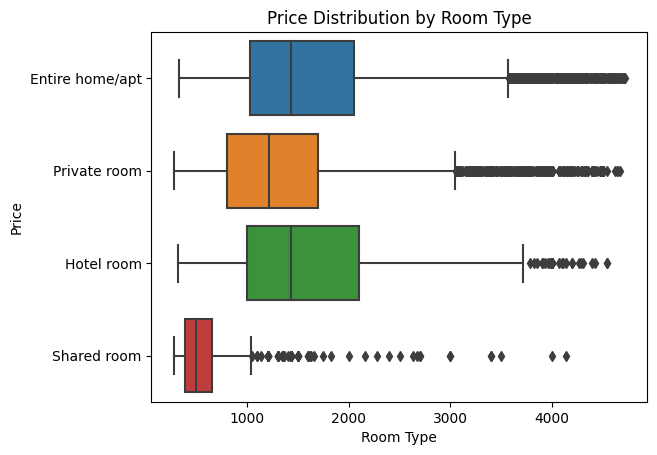

In [62]:
sns.boxplot(data=df, x='price', y='room_type')
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

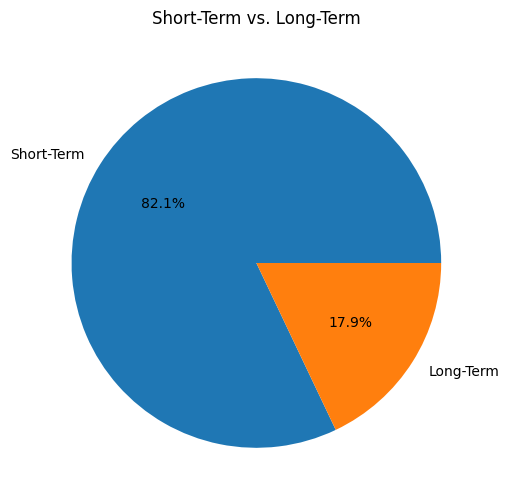

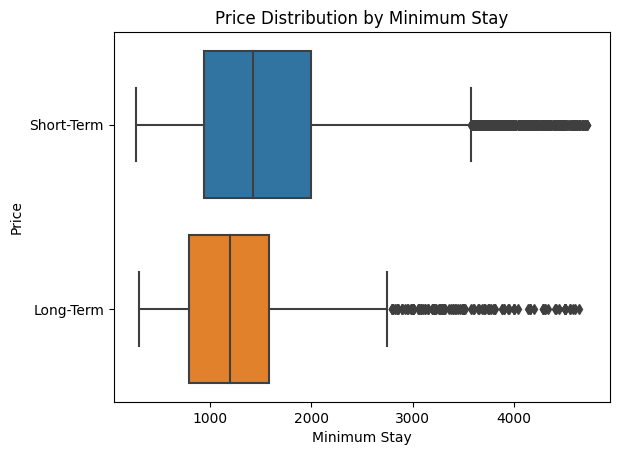

In [63]:
stay_counts = df['minimum_stay'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(stay_counts, labels=stay_counts.index, autopct='%1.1f%%')
plt.title("Short-Term vs. Long-Term")
plt.show()

sns.boxplot(data=df, x='price', y='minimum_stay')
plt.title("Price Distribution by Minimum Stay")
plt.xlabel("Minimum Stay")
plt.ylabel("Price")
plt.show()

In [64]:
neighbor_counts = df['neighbourhood'].value_counts()

top_neighborhoods = neighbor_counts.head(5).index.tolist()

df_top = df[df['neighbourhood'].isin(top_neighborhoods)]

m = folium.Map(location=[df_top['latitude'].mean(), df_top['longitude'].mean()], zoom_start=12)

for index, row in df_top.iterrows():
    neighborhood = row["neighbourhood"]
    latitude = row["latitude"]
    longitude = row["longitude"]


    folium.CircleMarker(
        location=[latitude, longitude],
        radius=3,
        fill=True,
        fill_opacity=0.5,
    ).add_to(m)

m

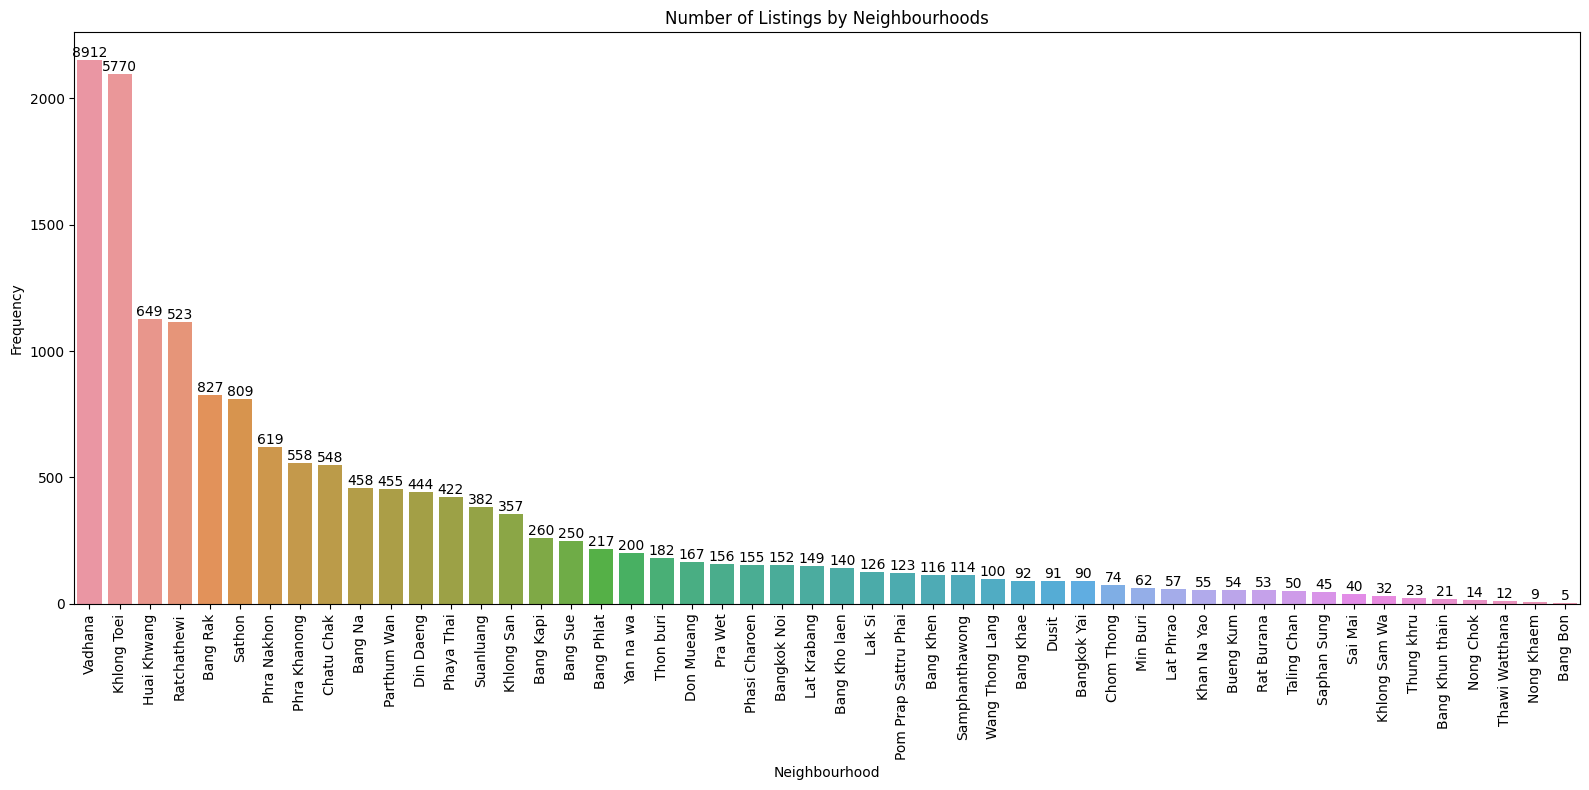

In [65]:
plt.figure(figsize = (16,8))
axes = sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index)
value = df['room_type'].value_counts(ascending=False)
labels = []
for p in zip(value):
    labels.append(f'{p[0]}')
axes.bar_label(container=axes.containers[0], labels=labels)

plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Number of Listings by Neighbourhoods')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

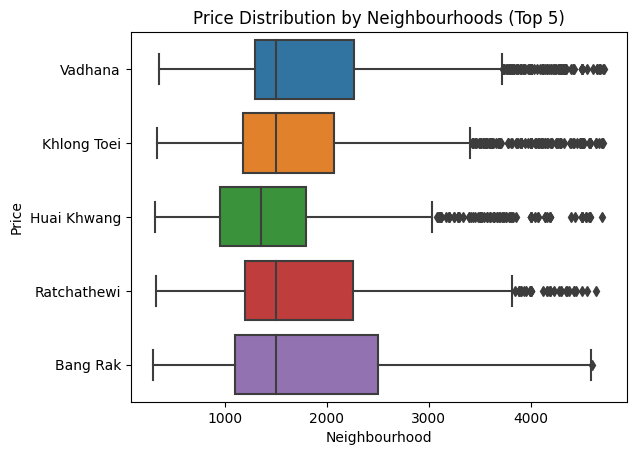

In [66]:
sns.boxplot(data=df_top, x='price', y='neighbourhood', order = df_top['neighbourhood'].value_counts().index)
plt.title("Price Distribution by Neighbourhoods (Top 5)")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.show()